In [1]:
import openbabel
from openbabel import pybel
import csv,sys
import pandas as pd
import numpy as np

In [2]:
#get SMARTS and Dataset
#file with column called “FG” with list of FGs to analyse, and column called “SMARTS” of SMARTS codes
SMARTS1=pd.read_csv('/Users/jiayun/Documents/work/outliers/SMARTS.csv') 

In [3]:
SMARTS1['SMARTS']

0                                           [F,Cl,Br,I]
1                                                   [F]
2                                                  [Cl]
3                                                  [Br]
4                                                   [I]
5                                           [CX3]=[OX1]
6                                     [#6][CX3](=O)[#6]
7                                       [CX3H1](=O)[#6]
8                                [NX3][CX3](=[OX1])[#6]
9                              [#6][CX3](=O)[OX2H0][#6]
10                                     [CX3](=O)[OX2H1]
11    [$([cX3](:*):*),$([cX2+](:*):*),$([CX3]=*),$([...
12                                         [$([CX2]#C)]
13                     [$([cX3](:*):*),$([cX2+](:*):*)]
14                                          [NX1]#[CX2]
15                                 [NX3;H2,H1;!$(NC=O)]
16              [$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]
17                                          [NX2

In [4]:
#load dataset 
fps_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/fps_ngboost_d_outliers2.csv')
m2v_ngb_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/m2v_ngboost_d_outliers2.csv')
bert_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert_d_outliers2.csv')
bert2_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert2_d_outliers2.csv')

In [5]:
#len(fps_d2)

In [6]:
#len(m2v_ngb_d2)

In [7]:
#len(bert_d2)

In [8]:
#len(bert2_d2)

In [9]:
#outputfile
Output="FG_hansen_d_fps_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=fps_d2['SMILES']
fps_d2=np.array(fps_d2)
FG_list=[]

for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    
#for each molecule
for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)    

In [10]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,BrC(Br)Br,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FC(F)(F)Br,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CCOC(=O)CCCC(=O)OCC,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,CF,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C=O,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,CC1=CN([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)C(=O)...,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
63,ICI,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,CCCCCCCCCc1ccccc1O,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
65,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
FG_sum_fps_d2 = (FG_list.iloc[:,1:30].astype(int).sum())
FG_sum_fps_d2_merge = (FG_sum_fps_d2.to_frame('fps_d2'))/len(fps_d2)

In [12]:
FG_sum_fps_d2_merge

,fps_d2
Halides,0.313433
F,0.119403
Cl,0.104478
Br,0.089552
I,0.044776
Carbonyl,0.179104
Ketone,0.014925
Aldehyde,0.000000
Amide,0.029851
Ester,0.059701


In [13]:
#outputfile
Output="FG_hansen_d_m2v_ngb_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=m2v_ngb_d2['SMILES']
m2v_ngb_d2=np.array(m2v_ngb_d2)
FG_list=[]

for f in range(len(m2v_ngb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_ngb_d2[f][4])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(m2v_ngb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_ngb_d2[f][4])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [14]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,S1C=CSC1=C2SC=CS2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,Cc1ccon1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,CF,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C=O,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,O=CC=O,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,S,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
58,ICI,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60,CC1COC(=O)O1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [15]:
FG_sum_m2v_ngb_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_m2v_ngb_d2_merge = (FG_sum_m2v_ngb_d2.to_frame('m2v_ngb_d2'))/len(m2v_ngb_d2)

In [16]:
FG_sum_m2v_ngb_d2_merge 

,m2v_ngb_d2
Halides,0.338710
F,0.129032
Cl,0.096774
Br,0.064516
I,0.080645
Carbonyl,0.193548
Ketone,0.000000
Aldehyde,0.016129
Amide,0.048387
Ester,0.064516


In [17]:
#outputfile
Output="FG_hansen_d_bert_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert_d2['smiles']
bert_d2=np.array(bert_d2)
FG_list=[]

for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][3])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][3])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [18]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,15.9,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,20.0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,21.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.6,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
4,15.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,15.0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
70,16.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,16.4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
72,16.2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
FG_sum_bert_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert_d2_merge = (FG_sum_bert_d2.to_frame('bert_d2'))/len(bert_d2)

In [20]:
#outputfile
Output="FG_hansen_d_bert2_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert2_d2['smiles']
bert2_d2=np.array(bert2_d2)
FG_list=[]

for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][3])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][3])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [21]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,20.0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,19.0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,15.6,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,12.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,18.3,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60,13.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,13.8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,22.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
FG_sum_bert2_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert2_d2_merge = (FG_sum_bert2_d2.to_frame('bert2_d2'))/len(bert2_d2)

In [23]:
FG_sum_bert2_d2_merge

,bert2_d2
Halides,0.500000
F,0.109375
Cl,0.296875
Br,0.031250
I,0.078125
Carbonyl,0.109375
Ketone,0.015625
Aldehyde,0.000000
Amide,0.015625
Ester,0.031250


In [24]:
FG_sum_hansen = pd.read_parquet('FG_sum_hansen.parquet')

In [25]:
FG_sum_hansen/1183

,hansen
Halides,0.252747
F,0.047337
Cl,0.174979
Br,0.040575
I,0.007608
Carbonyl,0.294167
Ketone,0.054100
Aldehyde,0.027050
Amide,0.024514
Ester,0.120034


In [26]:
FG_sum_fps_d2_merge ['m2v_ngb_d2'] =  FG_sum_m2v_ngb_d2_merge
FG_sum_fps_d2_merge ['bert_d2'] =  FG_sum_bert_d2_merge
FG_sum_fps_d2_merge ['bert2_d2'] =  FG_sum_bert2_d2_merge
FG_sum_fps_d2_merge ['hansen'] =  FG_sum_hansen/1183

In [27]:
FG_sum_fps_d2_merge

,fps_d2,m2v_ngb_d2,bert_d2,bert2_d2,hansen
Halides,0.313433,0.338710,0.459459,0.500000,0.252747
F,0.119403,0.129032,0.148649,0.109375,0.047337
Cl,0.104478,0.096774,0.175676,0.296875,0.174979
Br,0.089552,0.064516,0.108108,0.031250,0.040575
I,0.044776,0.080645,0.054054,0.078125,0.007608
Carbonyl,0.179104,0.193548,0.270270,0.109375,0.294167
Ketone,0.014925,0.000000,0.027027,0.015625,0.054100
Aldehyde,0.000000,0.016129,0.000000,0.000000,0.027050
Amide,0.029851,0.048387,0.081081,0.015625,0.024514
Ester,0.059701,0.064516,0.054054,0.031250,0.120034


Text(0, 0.5, 'Average occurance/molecule')

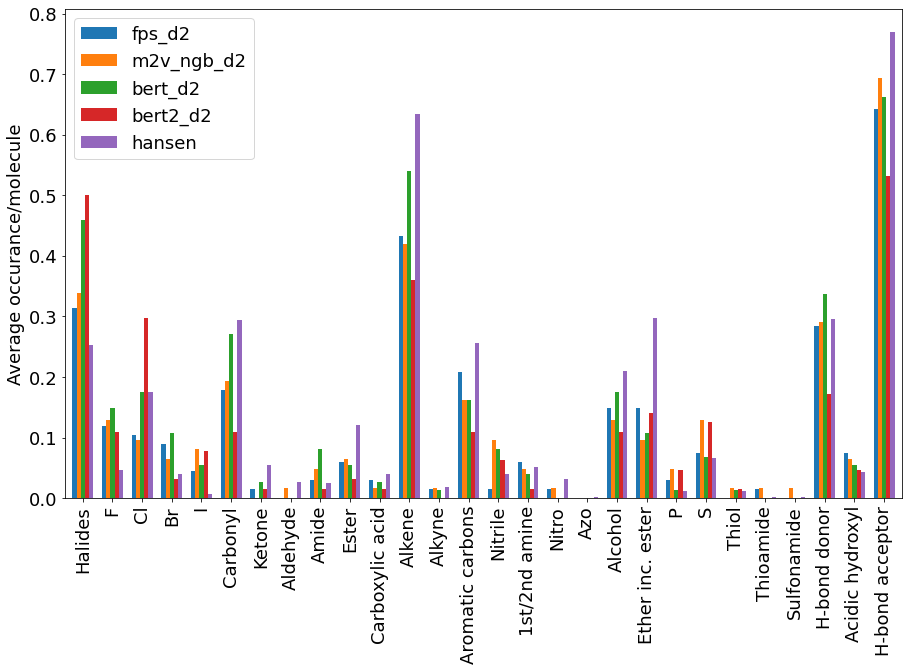

In [28]:
import matplotlib.pyplot as plt
# Set the default text font size
plt.rc('font', size=18)
ax=FG_sum_fps_d2_merge.plot.bar(figsize=(15,9), width=0.7)
ax.set_ylabel("Average occurance/molecule", size=18)

In [29]:
FG_sum_fps_d2_merge['fps'] = FG_sum_fps_d2_merge['fps_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['m2v_ngb'] = FG_sum_fps_d2_merge['m2v_ngb_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['bert'] = FG_sum_fps_d2_merge['bert_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['bert2'] = FG_sum_fps_d2_merge['bert2_d2']-FG_sum_fps_d2_merge['hansen']

In [30]:
FG_sum_fps_d2_merge

,fps_d2,m2v_ngb_d2,bert_d2,bert2_d2,hansen,fps,m2v_ngb,bert,bert2
Halides,0.313433,0.338710,0.459459,0.500000,0.252747,0.060686,0.085962,0.206712,0.247253
F,0.119403,0.129032,0.148649,0.109375,0.047337,0.072066,0.081695,0.101311,0.062038
Cl,0.104478,0.096774,0.175676,0.296875,0.174979,-0.070501,-0.078205,0.000697,0.121896
Br,0.089552,0.064516,0.108108,0.031250,0.040575,0.048977,0.023941,0.067533,-0.009325
I,0.044776,0.080645,0.054054,0.078125,0.007608,0.037168,0.073037,0.046446,0.070517
Carbonyl,0.179104,0.193548,0.270270,0.109375,0.294167,-0.115063,-0.100619,-0.023897,-0.184792
Ketone,0.014925,0.000000,0.027027,0.015625,0.054100,-0.039174,-0.054100,-0.027073,-0.038475
Aldehyde,0.000000,0.016129,0.000000,0.000000,0.027050,-0.027050,-0.010921,-0.027050,-0.027050
Amide,0.029851,0.048387,0.081081,0.015625,0.024514,0.005337,0.023873,0.056567,-0.008889
Ester,0.059701,0.064516,0.054054,0.031250,0.120034,-0.060332,-0.055518,-0.065980,-0.088784


In [31]:
FG_sum_fps_d2_merge_change = FG_sum_fps_d2_merge[['fps', 'm2v_ngb', 'bert', 'bert2']]

In [32]:
FG_sum_fps_d2_merge_change

,fps,m2v_ngb,bert,bert2
Halides,0.060686,0.085962,0.206712,0.247253
F,0.072066,0.081695,0.101311,0.062038
Cl,-0.070501,-0.078205,0.000697,0.121896
Br,0.048977,0.023941,0.067533,-0.009325
I,0.037168,0.073037,0.046446,0.070517
Carbonyl,-0.115063,-0.100619,-0.023897,-0.184792
Ketone,-0.039174,-0.054100,-0.027073,-0.038475
Aldehyde,-0.027050,-0.010921,-0.027050,-0.027050
Amide,0.005337,0.023873,0.056567,-0.008889
Ester,-0.060332,-0.055518,-0.065980,-0.088784


Text(0, 0.5, 'Change of average occurance/molecule')

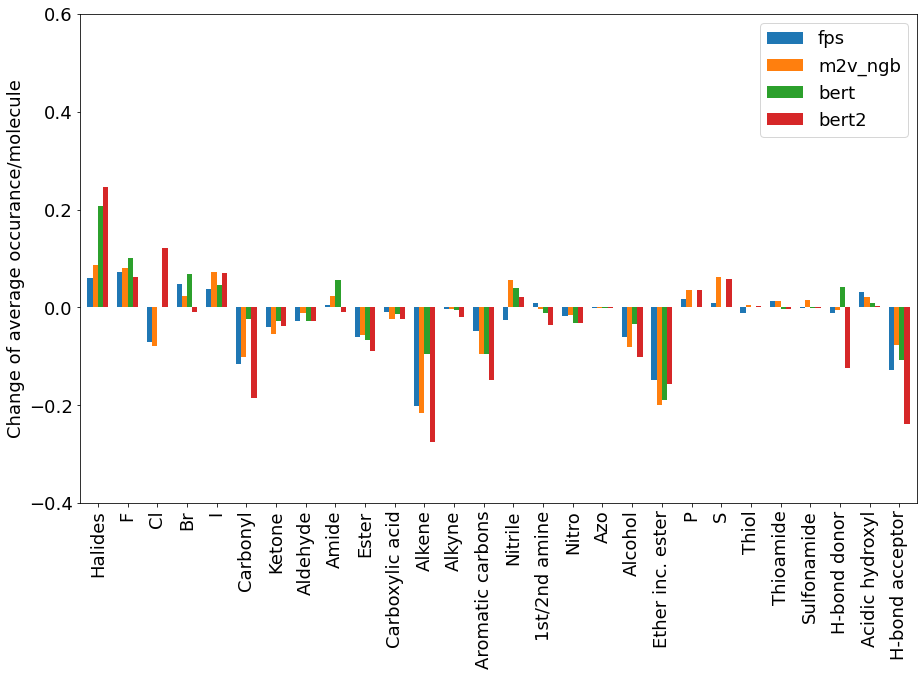

In [35]:
# Set the default text font size
plt.rc('font', size=18)
ax=FG_sum_fps_d2_merge_change.plot.bar(figsize=(15,9), ylim = (-0.4, 0.6), width=0.7)
ax.set_ylabel("Change of average occurance/molecule", size=18)